In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations
from datetime import datetime  # For handling date-time operations


In [3]:
# Load the dataset into a Pandas DataFrame
file_path = "expedia_travel_dataset.csv"  # Replace with the actual path to the dataset
data = pd.read_csv(file_path)  # Use '\t' as the separator for TSV files


In [4]:
# Remove rows with missing values in any column
data = data.dropna()

In [5]:
data.info()  # View column types and null values
data.describe()  # Get summary statistics


<class 'pandas.core.frame.DataFrame'>
Index: 63845 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  63845 non-null  object 
 1   site_name                  63845 non-null  int64  
 2   posa_continent             63845 non-null  int64  
 3   user_location_country      63845 non-null  int64  
 4   user_location_region       63845 non-null  int64  
 5   user_location_city         63845 non-null  int64  
 6   orig_destination_distance  63845 non-null  float64
 7   user_id                    63845 non-null  int64  
 8   is_mobile                  63845 non-null  int64  
 9   is_package                 63845 non-null  int64  
 10  channel                    63845 non-null  int64  
 11  srch_ci                    63845 non-null  object 
 12  srch_co                    63845 non-null  object 
 13  srch_adults_cnt            63845 non-null  int64  


,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,63845.000000,63845.000000,63845.000000,63845.000000,63845.000000,63845.000000,6.384500e+04,63845.000000,63845.000000,63845.000000,...,63845.000000,63845.000000,63845.000000,63845.000000,63845.000000,63845.000000,63845.000000,63845.000000,63845.000000,63845.000000
mean,6.212280,2.902436,87.717080,311.749550,27955.958509,1960.772432,5.990113e+05,0.135892,0.244154,5.986107,...,0.353982,1.101684,14357.001159,2.616117,0.083076,1.475260,2.885880,73.585715,616.152839,49.959511
std,8.984839,0.539947,54.515345,144.585305,16525.325563,2227.828840,3.443215e+05,0.342676,0.429588,3.733818,...,0.758512,0.419772,10767.555156,2.160514,0.276000,1.202899,1.492177,53.375667,472.415780,29.146627
min,2.000000,0.000000,0.000000,135.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,0.000000,...,0.000000,1.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,66.000000,174.000000,14656.000000,313.155000,3.029810e+05,0.000000,0.000000,2.000000,...,0.000000,1.000000,8267.000000,1.000000,0.000000,1.000000,2.000000,50.000000,245.000000,25.000000
50%,2.000000,3.000000,66.000000,321.000000,27550.000000,1132.257200,5.954140e+05,0.000000,0.000000,9.000000,...,0.000000,1.000000,11319.000000,1.000000,0.000000,1.000000,2.000000,50.000000,628.000000,49.000000
75%,2.000000,3.000000,66.000000,363.000000,42881.000000,2542.351300,8.989440e+05,0.000000,0.000000,9.000000,...,0.000000,1.000000,17672.000000,5.000000,0.000000,2.000000,4.000000,77.000000,701.000000,73.000000
max,48.000000,4.000000,215.000000,1021.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,10.000000,...,9.000000,8.000000,65035.000000,8.000000,1.000000,35.000000,6.000000,212.000000,2117.000000,99.000000


In [6]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 date_time                    0
site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_ci                      0
srch_co                      0
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_destination_type_id     0
is_booking                   0
cnt                          0
hotel_continent              0
hotel_country                0
hotel_market                 0
hotel_cluster                0
dtype: int64


In [8]:
data['date_time'] = pd.to_datetime(data['date_time'], format='%d-%m-%Y %H:%M')
data['srch_ci'] = pd.to_datetime(data['srch_ci'], format='%d-%m-%Y', errors='coerce') # Assuming srch_ci is in 'dd-mm-YYYY' format, handle errors with 'coerce'
data['srch_co'] = pd.to_datetime(data['srch_co'], format='%d-%m-%Y', errors='coerce') # Assuming srch_co is in 'dd-mm-YYYY' format, handle errors with 'coerce'

In [9]:
data['stay_length'] = (data['srch_co'] - data['srch_ci']).dt.days


In [31]:
data['booking_month'] = data['date_time'].dt.month

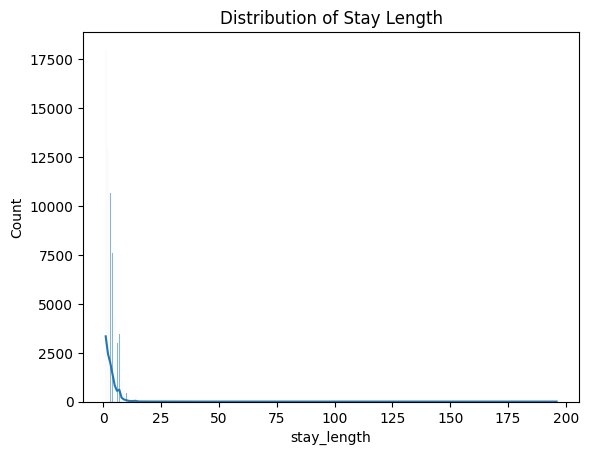

In [32]:
sns.histplot(data['stay_length'], kde=True)
plt.title('Distribution of Stay Length')
plt.show()

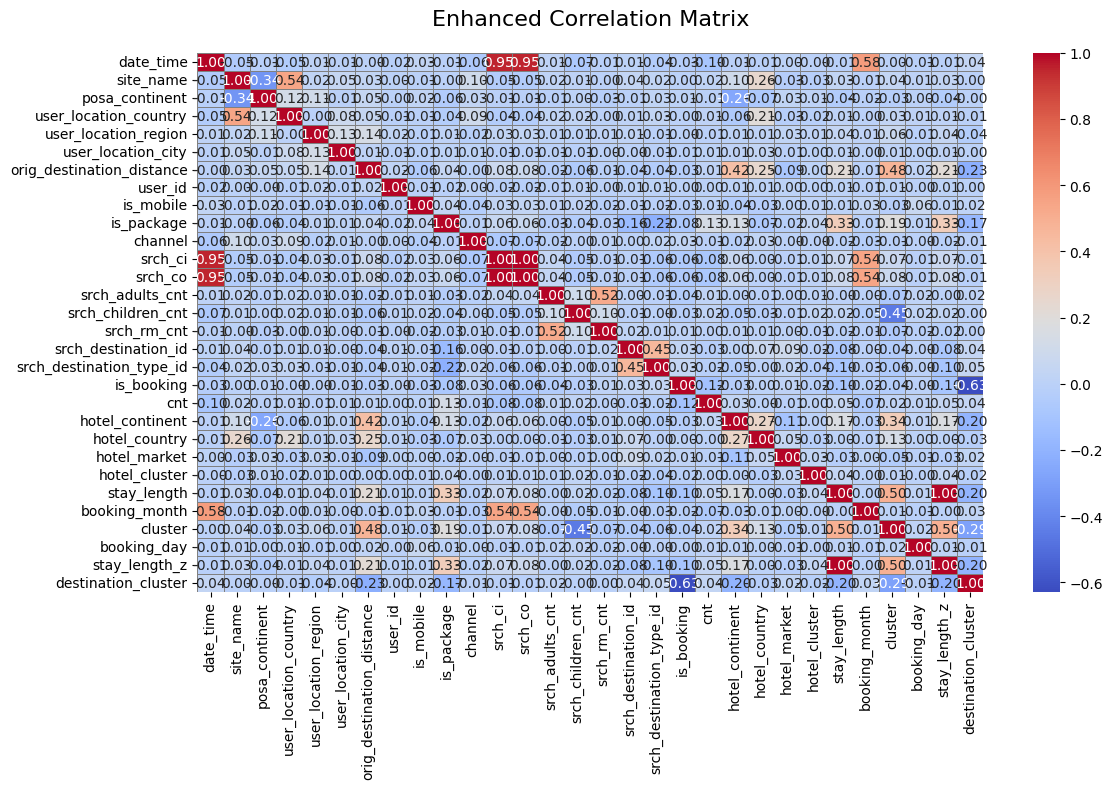

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation = data.corr()

# Set the figure size for better visibility
plt.figure(figsize=(12, 8))

# Create the heatmap with enhanced readability
sns.heatmap(
    correlation,
    annot=True,          # Annotate the cells with the correlation values
    fmt=".2f",           # Format annotations to 2 decimal places
    cmap="coolwarm",     # Color scheme for the heatmap
    cbar=True,           # Show the color bar
    annot_kws={"size": 10},  # Font size for annotations
    linewidths=0.5,      # Add space between cells
    linecolor='gray'     # Cell border color
)

# Add a descriptive title with adjusted font size
plt.title('Enhanced Correlation Matrix', fontsize=16, pad=20)

# Display the heatmap
plt.tight_layout()  # Adjust layout to prevent clipping of labels or title
plt.show()


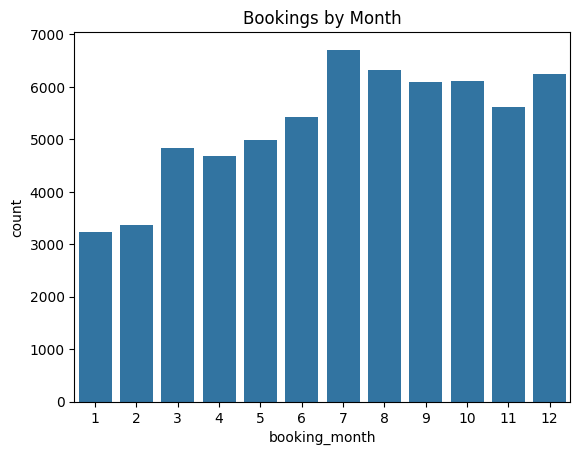

In [14]:
sns.countplot(x='booking_month', data=data)
plt.title('Bookings by Month')
plt.show()


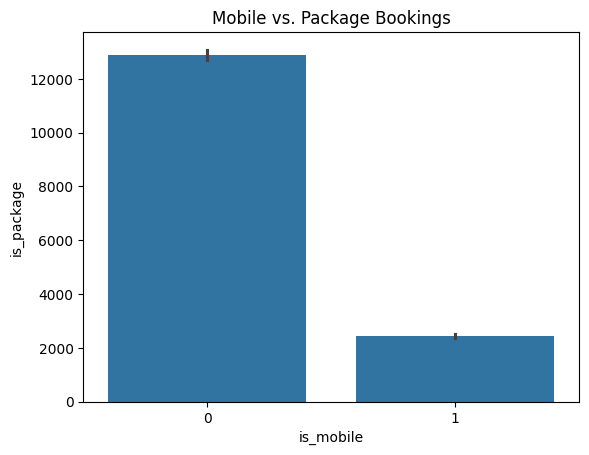

In [15]:
sns.barplot(x='is_mobile', y='is_package', data=data, estimator=sum)
plt.title('Mobile vs. Package Bookings')
plt.show()

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select and normalize features
features = data[['srch_adults_cnt', 'srch_children_cnt', 'stay_length', 'orig_destination_distance']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features.dropna())

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)

# Analyze clusters
cluster_summary = data.groupby('cluster').mean()
print(cluster_summary)


                            date_time  site_name  posa_continent  \
cluster                                                            
0       2014-03-21 01:03:05.109935872   6.147927        2.909546   
1       2014-04-06 09:48:48.925766144   5.920330        2.907533   
2       2014-04-02 16:39:26.214319872   6.768092        2.924748   
3       2014-03-28 20:07:27.688037120   6.980040        2.840978   

         user_location_country  user_location_region  user_location_city  \
cluster                                                                    
0                    89.629140            307.893404        27510.399527   
1                    85.528143            302.840478        27905.529366   
2                    92.155118            341.217876        28208.265545   
3                    90.939458            320.473893        28313.183212   

         orig_destination_distance        user_id  is_mobile  is_package  ...  \
cluster                                              

Training Dataset Evaluation
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     40786
           1       1.00      0.99      0.99      3735

    accuracy                           1.00     44521
   macro avg       1.00      0.99      1.00     44521
weighted avg       1.00      1.00      1.00     44521



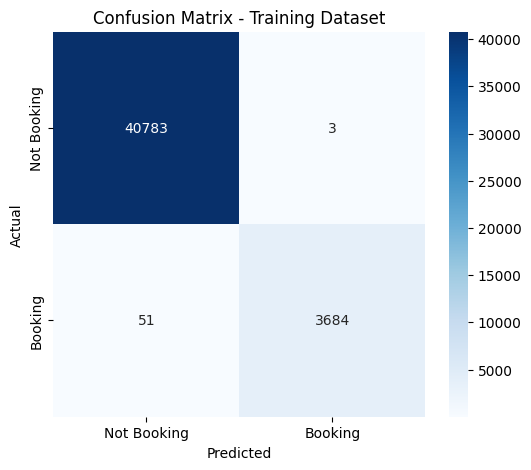


Testing Dataset Evaluation
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     17512
           1       0.09      0.09      0.09      1569

    accuracy                           0.85     19081
   macro avg       0.50      0.50      0.50     19081
weighted avg       0.85      0.85      0.85     19081



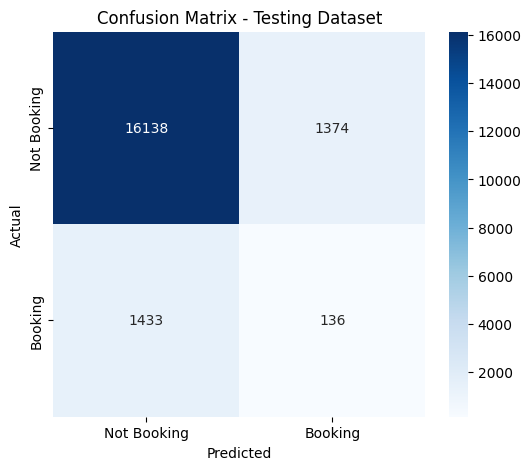

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define features and target
X = data[['is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'orig_destination_distance']].dropna()
y = data['is_booking']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions for both training and testing sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Booking', 'Booking'], yticklabels=['Not Booking', 'Booking'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate on training set
print("Training Dataset Evaluation")
print("Classification Report:\n", classification_report(y_train, y_train_pred))
plot_confusion_matrix(y_train, y_train_pred, "Confusion Matrix - Training Dataset")

# Evaluate on testing set
print("\nTesting Dataset Evaluation")
print("Classification Report:\n", classification_report(y_test, y_test_pred))
plot_confusion_matrix(y_test, y_test_pred, "Confusion Matrix - Testing Dataset")


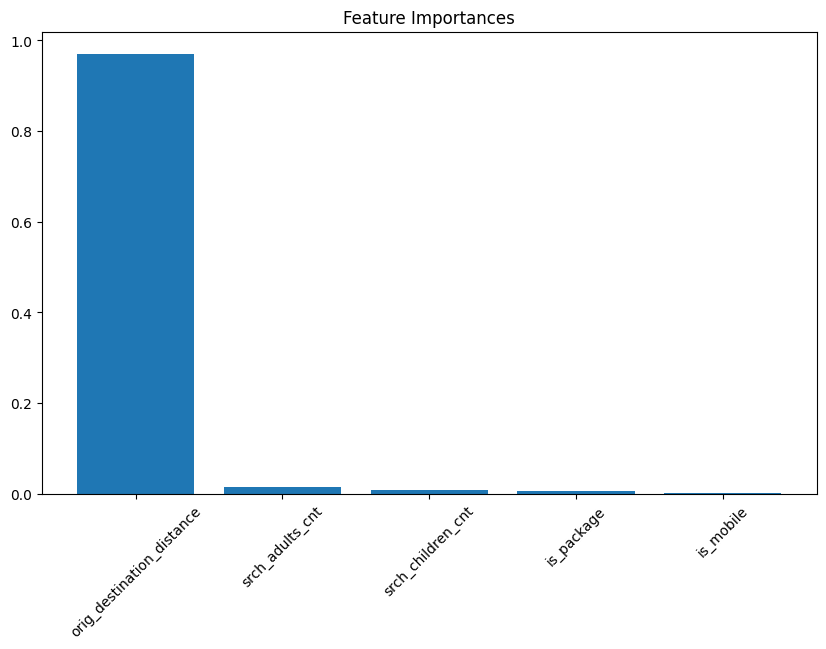

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Extract and plot feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=45)
plt.title('Feature Importances')
plt.show()


In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define features and target
X = data[['srch_adults_cnt', 'srch_children_cnt', 'orig_destination_distance']].dropna()
y = data['stay_length'].dropna()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting Regressor
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)

# Predictions for training and testing sets
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Compute MSE and RMSE for training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Compute MSE and RMSE for testing set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Display results
print("Training Dataset Evaluation:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")

print("\nTesting Dataset Evaluation:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")


Training Dataset Evaluation:
Mean Squared Error (MSE): 7.442879673922598
Root Mean Squared Error (RMSE): 2.7281641581698484

Testing Dataset Evaluation:
Mean Squared Error (MSE): 8.401451013130636
Root Mean Squared Error (RMSE): 2.8985256619755217


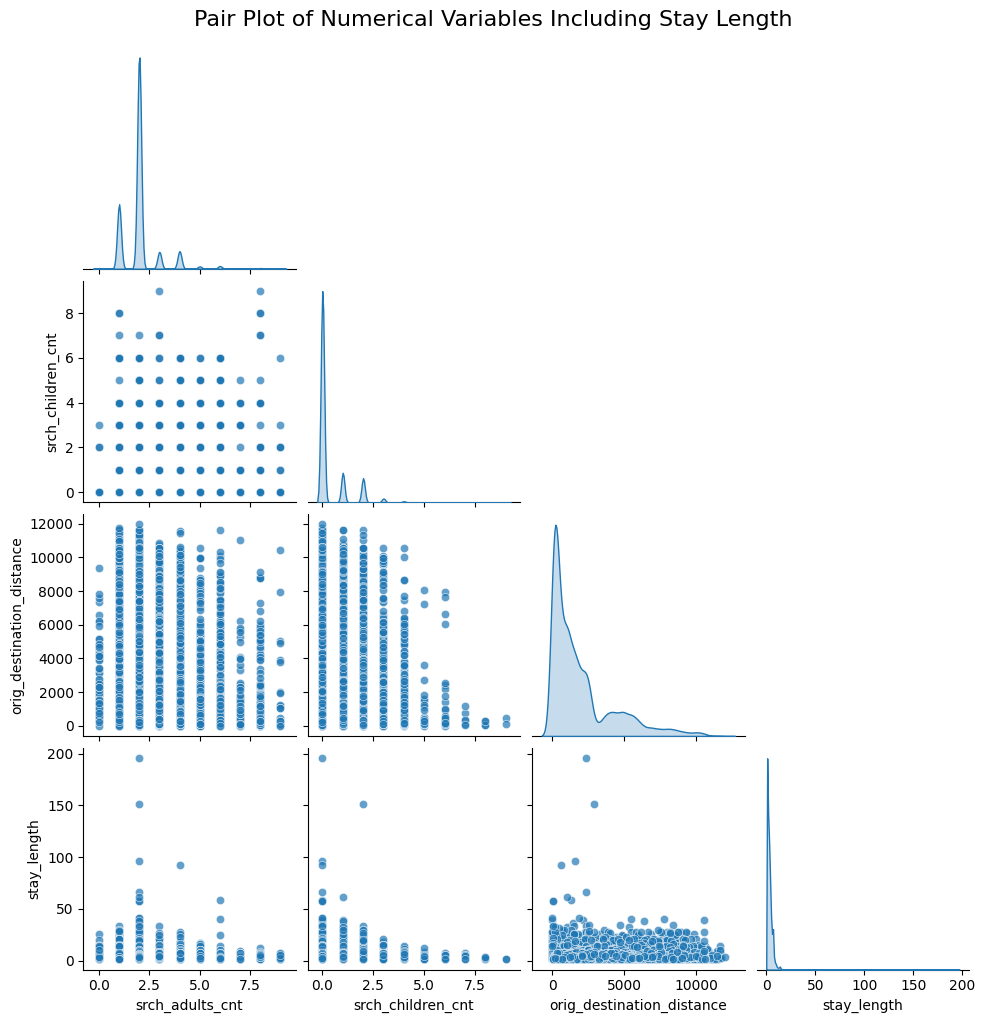

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure `stay_length` is calculated
data['stay_length'] = (data['srch_co'] - data['srch_ci']).dt.days

# Filter for numerical columns including `stay_length`
numerical_cols = ['srch_adults_cnt', 'srch_children_cnt', 'orig_destination_distance', 'stay_length']
numerical_data = data[numerical_cols]  # Drop rows with NaN values in numerical columns

# Create a pair plot
sns.pairplot(numerical_data, diag_kind='kde', corner=True, plot_kws={'alpha': 0.7})

# Add a title
plt.suptitle('Pair Plot of Numerical Variables Including Stay Length', y=1.02, fontsize=16)
plt.show()

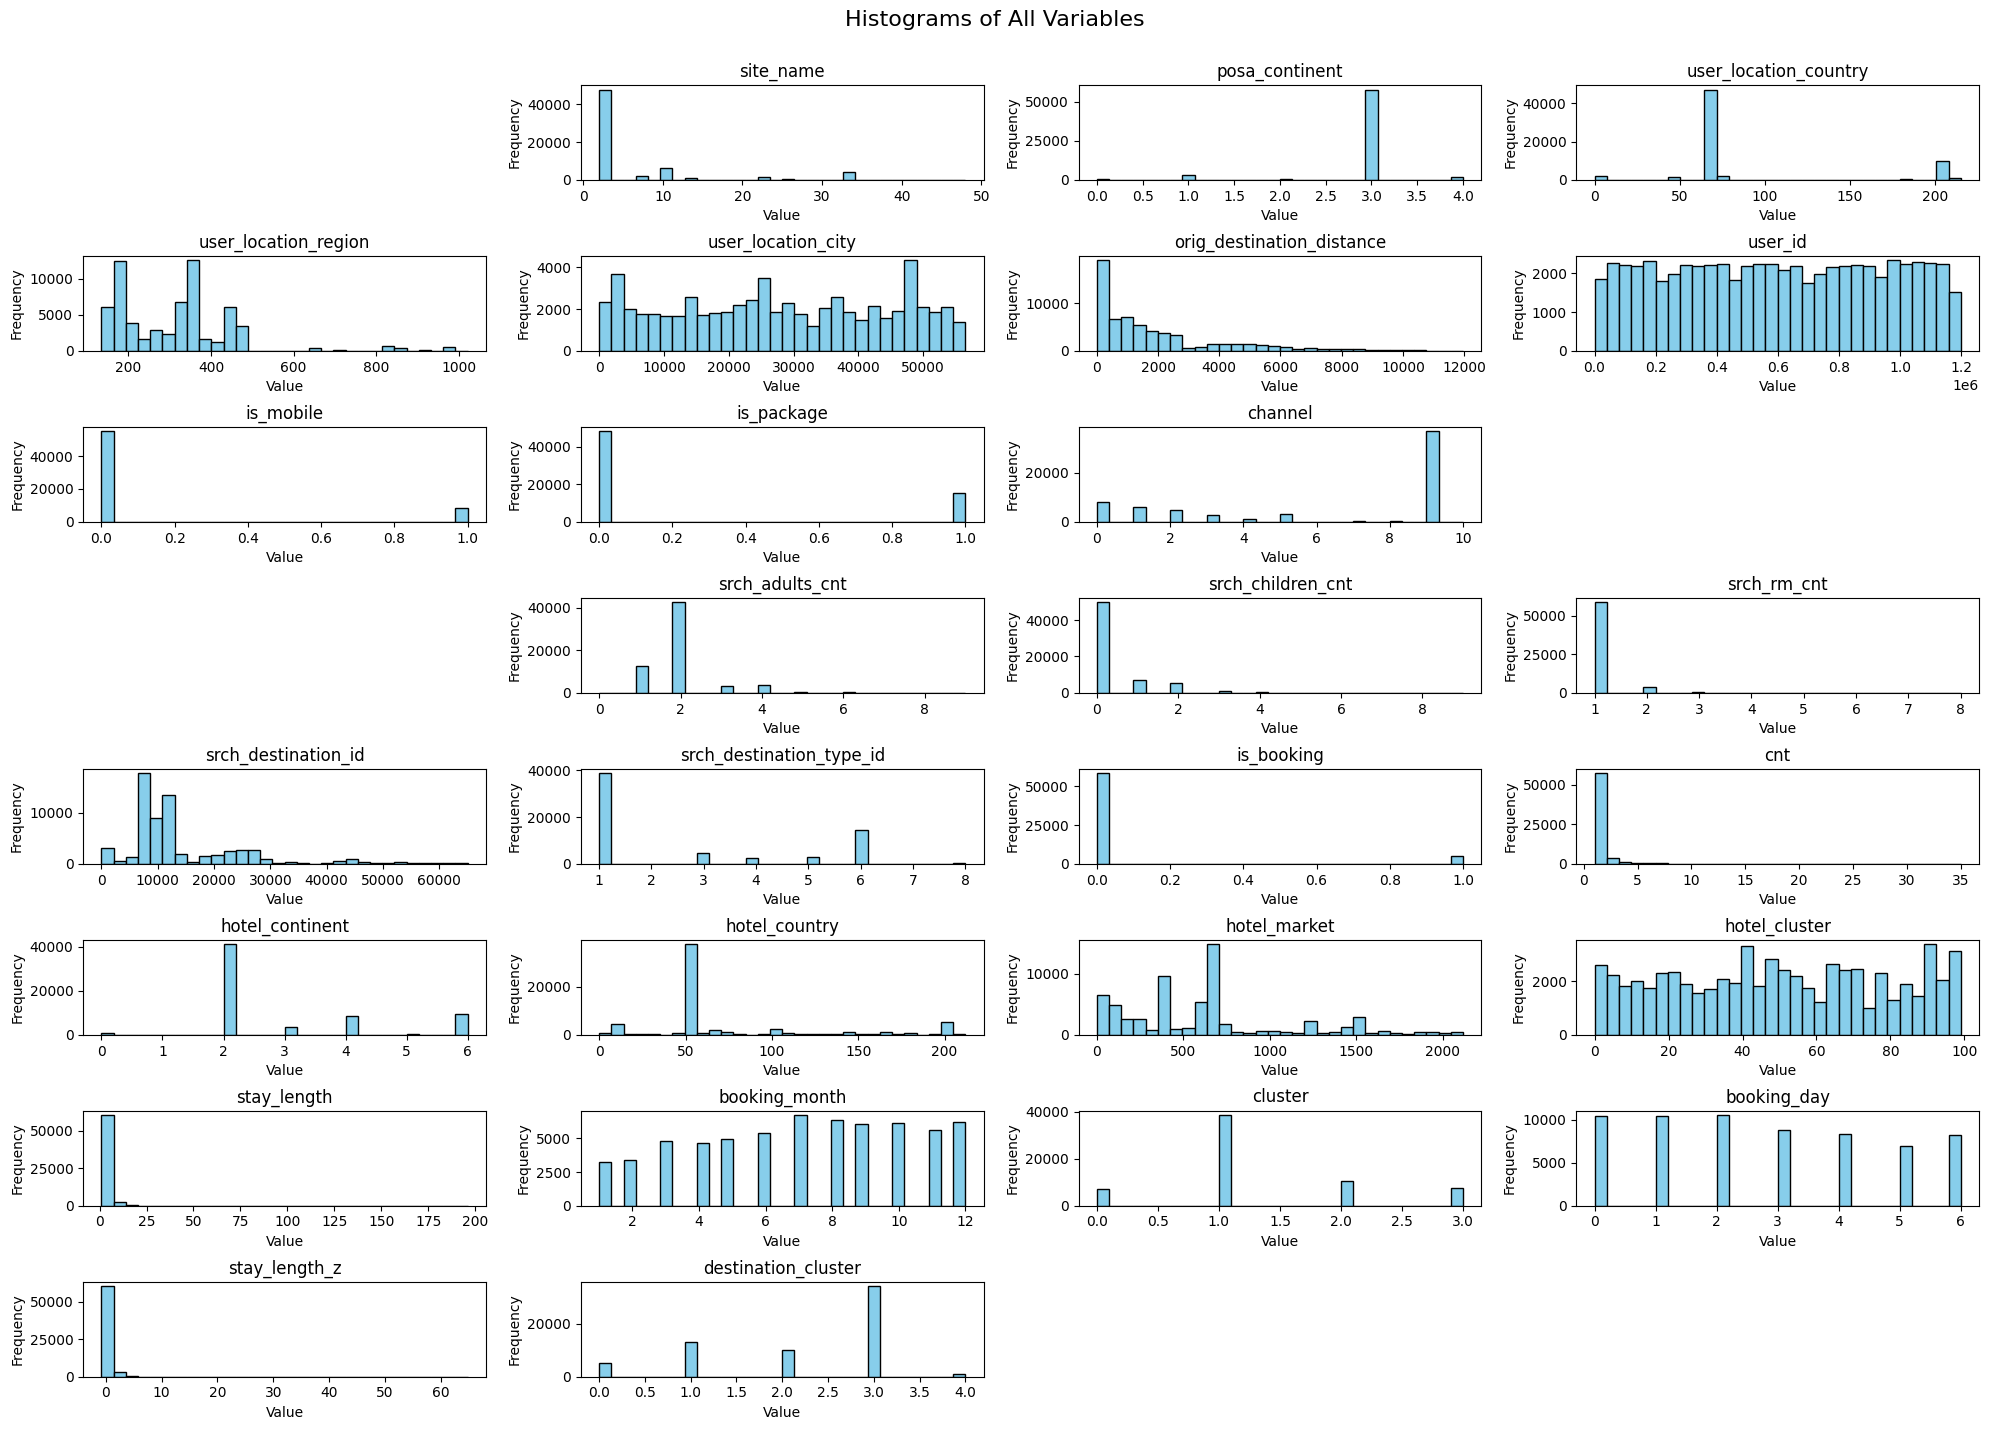

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Generate a grid of histograms for all variables
def plot_all_histograms(data, bins=30, figsize=(20, 15)):
    # Define the grid layout
    n_cols = 4  # Number of columns for subplots
    n_rows = (len(data.columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

    # Create a figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    # Plot each variable
    for i, col in enumerate(data.columns):
        if pd.api.types.is_numeric_dtype(data[col]):  # Only plot numerical variables
            axes[i].hist(data[col].dropna(), bins=bins, color='skyblue', edgecolor='black')
            axes[i].set_title(col, fontsize=12)
            axes[i].set_xlabel('Value', fontsize=10)
            axes[i].set_ylabel('Frequency', fontsize=10)
        else:
            axes[i].axis('off')  # Hide unused axes for non-numeric variables

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Add a main title and adjust layout
    plt.suptitle('Histograms of All Variables', fontsize=16, y=0.95)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Call the function with the dataset
plot_all_histograms(data)


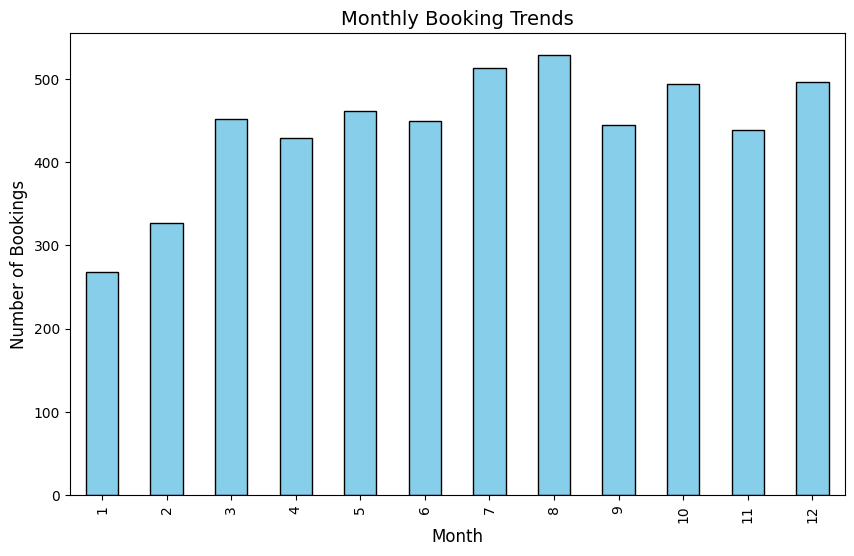

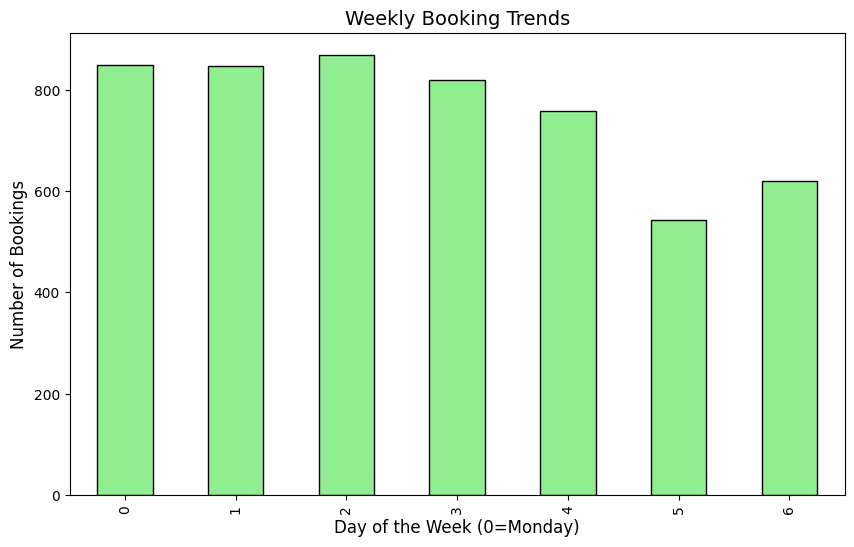

In [23]:
data['booking_month'] = data['date_time'].dt.month
data['booking_day'] = data['date_time'].dt.dayofweek  # Monday=0, Sunday=6

# Monthly booking trends
monthly_trends = data.groupby('booking_month')['is_booking'].sum()
monthly_trends.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 6))
plt.title('Monthly Booking Trends', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.show()

# Weekly booking trends
weekly_trends = data.groupby('booking_day')['is_booking'].sum()
weekly_trends.plot(kind='bar', color='lightgreen', edgecolor='black', figsize=(10, 6))
plt.title('Weekly Booking Trends', fontsize=14)
plt.xlabel('Day of the Week (0=Monday)', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.show()


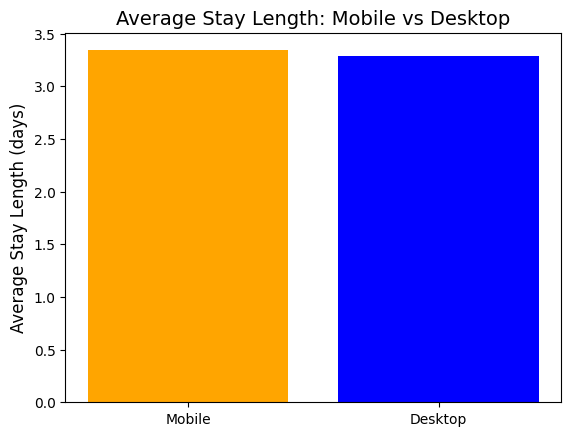

In [24]:
mobile_data = data[data['is_mobile'] == 1]
desktop_data = data[data['is_mobile'] == 0]

# Compare average stay length
stay_comparison = {
    'Mobile': mobile_data['stay_length'].mean(),
    'Desktop': desktop_data['stay_length'].mean()
}
plt.bar(stay_comparison.keys(), stay_comparison.values(), color=['orange', 'blue'])
plt.title('Average Stay Length: Mobile vs Desktop', fontsize=14)
plt.ylabel('Average Stay Length (days)', fontsize=12)
plt.show()


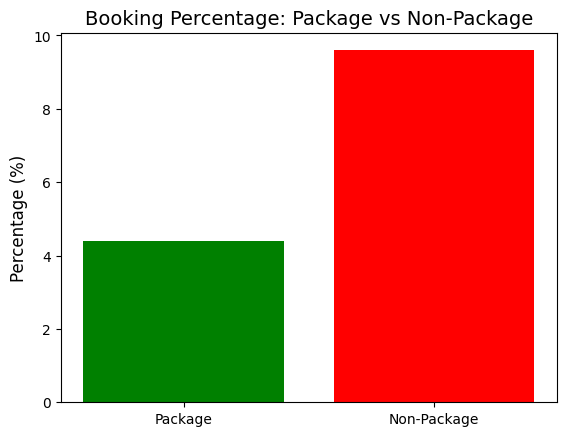

In [25]:
package_data = data[data['is_package'] == 1]
non_package_data = data[data['is_package'] == 0]

# Booking percentage
booking_comparison = {
    'Package': package_data['is_booking'].mean() * 100,
    'Non-Package': non_package_data['is_booking'].mean() * 100
}
plt.bar(booking_comparison.keys(), booking_comparison.values(), color=['green', 'red'])
plt.title('Booking Percentage: Package vs Non-Package', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()


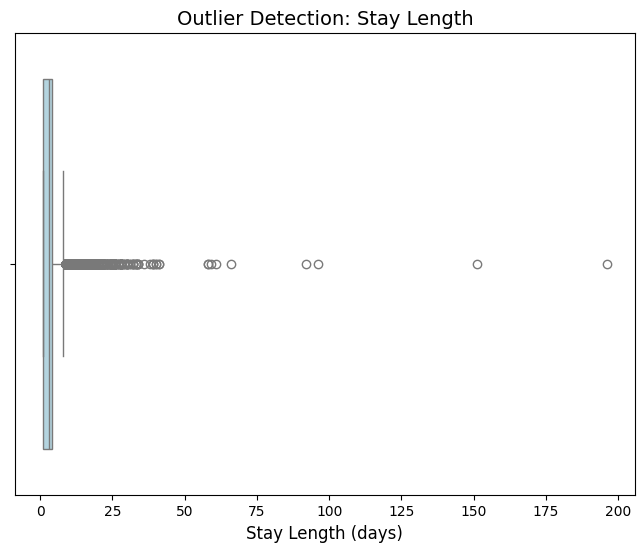

Number of outliers: 856


In [38]:
from scipy.stats import zscore

# Calculate z-scores for stay_length
data['stay_length_z'] = zscore(data['stay_length'])
outliers = data[np.abs(data['stay_length_z']) > 3]

# Boxplot for stay_length
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['stay_length'], color='lightblue')
plt.title('Outlier Detection: Stay Length', fontsize=14)
plt.xlabel('Stay Length (days)', fontsize=12)
plt.show()

print("Number of outliers:", len(outliers))

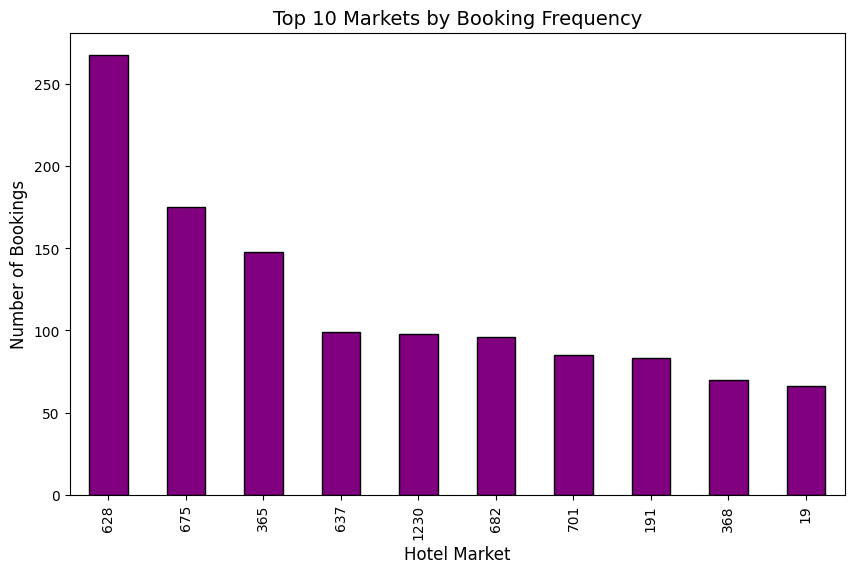

In [27]:
top_markets = data.groupby('hotel_market')['is_booking'].sum().sort_values(ascending=False).head(10)
top_markets.plot(kind='bar', color='purple', edgecolor='black', figsize=(10, 6))
plt.title('Top 10 Markets by Booking Frequency', fontsize=14)
plt.xlabel('Hotel Market', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.show()


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features and target
X = data[['srch_adults_cnt', 'srch_children_cnt', 'orig_destination_distance']].dropna()
y = data['hotel_cluster'].dropna()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Hotel Cluster Prediction: {accuracy * 100:.2f}%")


Accuracy of Hotel Cluster Prediction: 3.93%


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define features and target (assuming 'is_booking' indicates cancellation when 0)
X = data[['stay_length', 'is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt']].dropna()
y = 1 - data['is_booking'].dropna()  # Convert booking (1) to non-cancellation (0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Evaluate the model
y_pred = gbc.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1569
           1       0.92      1.00      0.96     17512

    accuracy                           0.92     19081
   macro avg       0.46      0.50      0.48     19081
weighted avg       0.84      0.92      0.88     19081

Accuracy: 0.9177716052617787


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


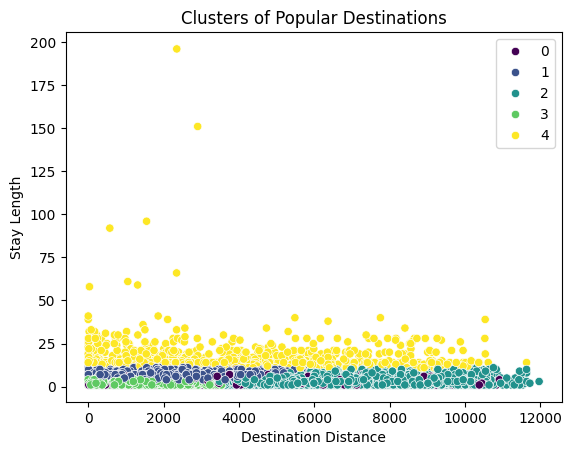

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Select features for clustering
cluster_data = data[['orig_destination_distance', 'stay_length', 'is_booking']].dropna()

# Scale the data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_data_scaled)
data['destination_cluster'] = cluster_labels

# Visualize clusters
sns.scatterplot(
    x=cluster_data['orig_destination_distance'],
    y=cluster_data['stay_length'],
    hue=cluster_labels,
    palette='viridis'
)
plt.title('Clusters of Popular Destinations')
plt.xlabel('Destination Distance')
plt.ylabel('Stay Length')
plt.show()
